In [33]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("src/")
from src.transport_model import TransportModel, get_data_loaders, get_model_inputs, ModelEnsemble
from src.db_handler import DB_handler
import os
import torch
from src.constants import *
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

In [34]:
db = DB_handler("data/db6june.feather")
ensemble = ModelEnsemble(10)
ensemble.load("db6june_with_ions_40epochs")

In [35]:
x_train, x_test, y_train, y_test = db.train_test_split(0.1)

In [40]:
intersection = x_test.index.intersection(data_for_1_Lmode.index)

In [41]:
intersection

Int64Index([519277], dtype='int64')

In [4]:
def save_is_outlier_csv(shot):
    shot_data = db[db[SHOT] == shot]
    shot_data[[TIME, IS_OUTLIER]].to_csv(f"{shot}outliers.csv")

[32303 35322 35346 35347 35393 35474 35493 35533 35534 35631 35728 35753
 35758 35793 35799 35805 35844 35846 35848 35894 35895 35896 35959 36048
 36049 36053 36087 36149 36163 36175 36222 36265 36266 36297 36299 36305
 36307 36309 36327 36328 36329 36330 36358 36401 36522 36523 36561 36576
 36577 36599 36602 36774 36775 37069 37072 37077 37085 37117 37183 37186
 37187 37188 37205 37289 37291 37298 37301 37375 37388 37390 37391 37443
 37455 37498 37529 37542 37543 37545 37546 37560 37611 37628 37642 37650
 37706 37717 37719 37721 37723 37751 37814 37922 37935 38023 38025 38027
 38033 38127 38181 38182 38183 38187 38292 38302 38357 38371 38489 38514
 38515 38526 38527 38528 38531 38538 38540 38541 38542 38543 38545 38559
 38590 38709 38786 38789 38791 38843 38885 38892 38893 38918 38974 38999
 39000 39218 39219 39221 39254 39293 39307 39322 39324 39336 39342 39386
 39388 39446 39573 39587 39640 39641 39642 39996 40003 40195 40258 40259
 40372 40402 40577 40590 40591 40592 40593 40594 40

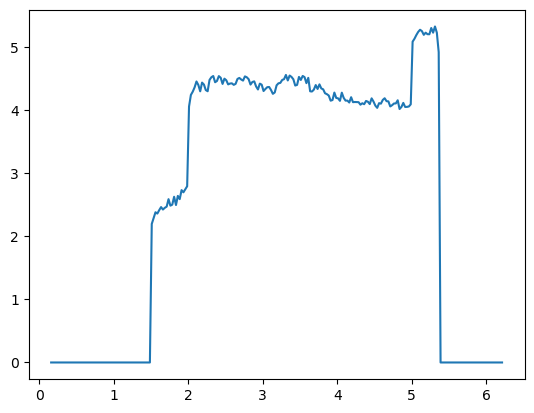

In [5]:
interesting_data = db[db[ECRH_POWER] > 4e6]
shots = interesting_data[SHOT].unique()
print(shots)
# shots to use: 36049, 37542
shot1 = 36049
shot2 = 37542
shot_data_1 = db[db[SHOT] == shot1]
shot_data_2 = db[db[SHOT] == shot2]

shot = shot1
plt.plot(db[db[SHOT] == shot].groupby(TIME).max()[ECRH_POWER]/1e6)
#save_is_outlier_csv(shot)

In [7]:
data_for_1_Lmode = db[(db[SHOT] == shot1) & np.isclose(db[TIME], 1.235, 0.001)]
data_for_1_Hmode = db[(db[SHOT] == shot1) & np.isclose(db[TIME], 2.06, 0.002)]

data_for_2_Lmode = db[(db[SHOT] == shot2) & np.isclose(db[TIME], 1.26, 0.001)]
data_for_2_Hmode = db[(db[SHOT] == shot2) & np.isclose(db[TIME], 2.11, 0.002)]
print(data_for_1_Lmode.shape, data_for_1_Hmode.shape,
      data_for_2_Lmode.shape, data_for_2_Hmode.shape)

(12, 50) (12, 50) (12, 50) (12, 50)


In [8]:
print(data_for_1_Hmode[IS_OUTLIER])

519672    False
519673    False
519674    False
519675    False
519676    False
519677    False
519678    False
519679    False
519680    False
519681    False
519682    False
519683    False
Name: is_potential_outlier, dtype: bool


In [9]:
l_mode_inputs_1 = get_model_inputs(data_for_1_Lmode)
h_mode_inputs_1 = get_model_inputs(data_for_1_Hmode)

l_mode_inputs_2 = get_model_inputs(data_for_2_Lmode)
h_mode_inputs_2 = get_model_inputs(data_for_2_Hmode)

fits_l_mode_1 = []
for input in l_mode_inputs_1:
    fits_l_mode_1.append(ensemble.predict(input))
fits_l_mode_1 = np.array(fits_l_mode_1)

fits_h_mode_1 = []
for input in h_mode_inputs_1:
    fits_h_mode_1.append(ensemble.predict(input))
fits_h_mode_1 = np.array(fits_h_mode_1)

fits_l_mode_1_mean = fits_l_mode_1.mean(axis=1)
fits_l_mode_1_std = fits_l_mode_1.std(axis=1)

fits_h_mode_1_mean = fits_h_mode_1.mean(axis=1)
fits_h_mode_1_std = fits_h_mode_1.std(axis=1)


fits_l_mode_2 = []
for input in l_mode_inputs_2:
    fits_l_mode_2.append(ensemble.predict(input))
fits_l_mode_2 = np.array(fits_l_mode_2)

fits_h_mode_2 = []
for input in h_mode_inputs_2:
    fits_h_mode_2.append(ensemble.predict(input))
fits_h_mode_2 = np.array(fits_h_mode_2)

fits_l_mode_2_mean = fits_l_mode_2.mean(axis=1)
fits_l_mode_2_std = fits_l_mode_2.std(axis=1)

fits_h_mode_2_mean = fits_h_mode_2.mean(axis=1)
fits_h_mode_2_std = fits_h_mode_2.std(axis=1)

In [10]:
data_for_35894_Lmode = db[(db[SHOT] == 35894) & np.isclose(db[TIME], 2.61, 0.001)]
data_for_35894_Hmode = db[(db[SHOT] == 35894) & np.isclose(db[TIME], 3.41, 0.002)]
l_mode_inputs = get_model_inputs(data_for_35894_Lmode)
h_mode_inputs = get_model_inputs(data_for_35894_Hmode)

fits_l_mode = []
for input in l_mode_inputs:
    fits_l_mode.append(ensemble.predict(input))
fits_l_mode = np.array(fits_l_mode)

fits_h_mode = []
for input in h_mode_inputs:
    fits_h_mode.append(ensemble.predict(input))
fits_h_mode = np.array(fits_h_mode)

fits_l_mode_mean = fits_l_mode.mean(axis=1)
fits_l_mode_std = fits_l_mode.std(axis=1)

fits_h_mode_mean = fits_h_mode.mean(axis=1)
fits_h_mode_std = fits_h_mode.std(axis=1)

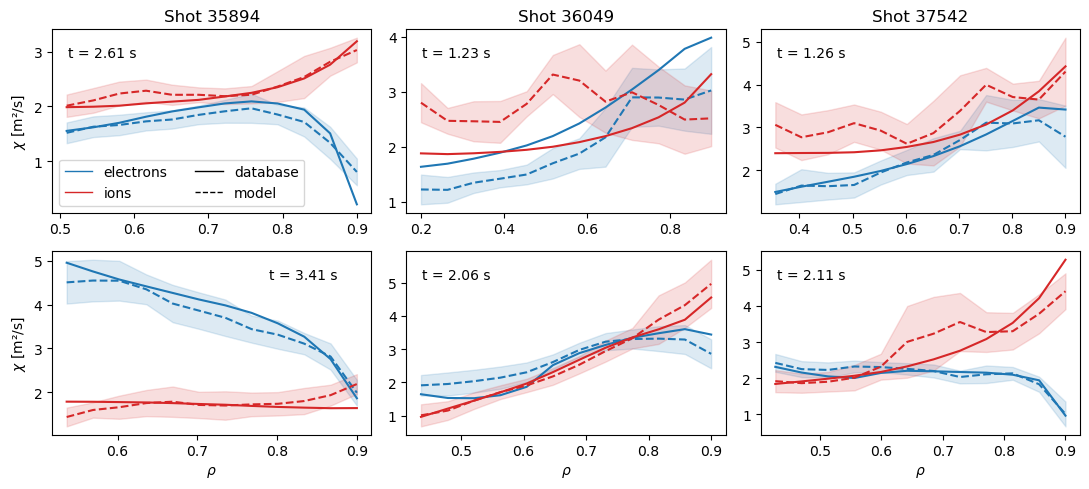

In [32]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(11, 5))


ax1.plot(data_for_35894_Lmode[RHO], data_for_35894_Lmode[CHI_ELECTRON], label="database", color="tab:blue")
ax1.plot(data_for_35894_Lmode[RHO], fits_l_mode_mean[:, 0], "--", color="tab:blue", label="model")
ax1.fill_between(data_for_35894_Lmode[RHO], 
         fits_l_mode_mean[:, 0] - fits_l_mode_std[:, 0], 
         fits_l_mode_mean[:, 0] + fits_l_mode_std[:, 0], alpha=0.15, color="tab:blue")
ax1.plot(data_for_35894_Lmode[RHO], data_for_35894_Lmode[CHI_ION], label="database", color="tab:red")
ax1.plot(data_for_35894_Lmode[RHO], fits_l_mode_mean[:, 1], "--", color="tab:red", label="model")
ax1.fill_between(data_for_35894_Lmode[RHO], 
         fits_l_mode_mean[:, 1] - fits_l_mode_std[:, 1], 
         fits_l_mode_mean[:, 1] + fits_l_mode_std[:, 1], alpha=0.15, color="tab:red")

ax1.set_ylabel(r"$\chi$ [m²/s]")
ax1.set_title("Shot 35894")
ax1.annotate("t = 2.61 s", xy=(0.05,0.85),xycoords='axes fraction',
             fontsize=10)
custom_lines = [Line2D([0], [0], color="tab:blue", lw=1),
                Line2D([0], [0], color="tab:red", lw=1),
                Line2D([0], [0], color="black", lw=1),
                Line2D([0], [0], color="black", ls="--", lw=1)]
ax1.legend(custom_lines, ["electrons", "ions", "database", "model"], ncols=2, loc="lower left")

ax4.plot(data_for_35894_Hmode[RHO], data_for_35894_Hmode[CHI_ELECTRON], color="tab:blue")
ax4.plot(data_for_35894_Hmode[RHO], fits_h_mode_mean[:, 0], "--", color="tab:blue")
ax4.fill_between(data_for_35894_Hmode[RHO], 
         fits_h_mode_mean[:, 0] - fits_h_mode_std[:, 0], 
         fits_h_mode_mean[:, 0] + fits_h_mode_std[:, 0], alpha=0.15, color="tab:blue")

ax4.plot(data_for_35894_Hmode[RHO], data_for_35894_Hmode[CHI_ION], color="tab:red")
ax4.plot(data_for_35894_Hmode[RHO], fits_h_mode_mean[:, 1], "--", color="tab:red")
ax4.fill_between(data_for_35894_Hmode[RHO], 
         fits_h_mode_mean[:, 1] - fits_h_mode_std[:, 1], 
         fits_h_mode_mean[:, 1] + fits_h_mode_std[:, 1], alpha=0.15, color="tab:red")
ax4.set_ylabel(r"$\chi$ [m²/s]")
ax4.set_xlabel(r"$\rho$")
ax4.annotate("t = 3.41 s", xy=(0.68,0.85),xycoords='axes fraction',
             fontsize=10)


ax2.plot(data_for_1_Lmode[RHO], data_for_1_Lmode[CHI_ELECTRON], label="database", color="tab:blue")
ax2.plot(data_for_1_Lmode[RHO], fits_l_mode_1_mean[:, 0], "--", color="tab:blue", label="model")
ax2.fill_between(data_for_1_Lmode[RHO], 
         fits_l_mode_1_mean[:, 0] - fits_l_mode_1_std[:, 0], 
         fits_l_mode_1_mean[:, 0] + fits_l_mode_1_std[:, 0], alpha=0.15, color="tab:blue")

ax2.plot(data_for_1_Lmode[RHO], data_for_1_Lmode[CHI_ION], label="database", color="tab:red")
ax2.plot(data_for_1_Lmode[RHO], fits_l_mode_1_mean[:, 1], "--", color="tab:red", label="model")
ax2.fill_between(data_for_1_Lmode[RHO], 
         fits_l_mode_1_mean[:, 1] - fits_l_mode_1_std[:, 1], 
         fits_l_mode_1_mean[:, 1] + fits_l_mode_1_std[:, 1], alpha=0.15, color="tab:red")
ax2.set_title(f"Shot {shot1}")
ax2.annotate("t = 1.23 s", xy=(0.05,0.85),xycoords='axes fraction',
             fontsize=10)

ax5.plot(data_for_1_Hmode[RHO], data_for_1_Hmode[CHI_ELECTRON], color="tab:blue")
ax5.plot(data_for_1_Hmode[RHO], fits_h_mode_1_mean[:, 0], "--", color="tab:blue")
ax5.fill_between(data_for_1_Hmode[RHO], 
         fits_h_mode_1_mean[:, 0] - fits_h_mode_1_std[:, 0], 
         fits_h_mode_1_mean[:, 0] + fits_h_mode_1_std[:, 0], alpha=0.15, color="tab:blue")
ax5.plot(data_for_1_Hmode[RHO], data_for_1_Hmode[CHI_ION], color="tab:red")
ax5.plot(data_for_1_Hmode[RHO], fits_h_mode_1_mean[:, 1], "--", color="tab:red")
ax5.fill_between(data_for_1_Hmode[RHO], 
         fits_h_mode_1_mean[:, 1] - fits_h_mode_1_std[:, 1], 
         fits_h_mode_1_mean[:, 1] + fits_h_mode_1_std[:, 1], alpha=0.15, color="tab:red")

ax5.set_xlabel(r"$\rho$")
ax5.annotate("t = 2.06 s", xy=(0.05,0.85),xycoords='axes fraction',
             fontsize=10)


ax3.plot(data_for_2_Lmode[RHO], data_for_2_Lmode[CHI_ELECTRON], color="tab:blue")
ax3.plot(data_for_2_Lmode[RHO], fits_l_mode_2_mean[:, 0], "--", color="tab:blue")
ax3.fill_between(data_for_2_Lmode[RHO], 
         fits_l_mode_2_mean[:, 0] - fits_l_mode_2_std[:, 0], 
         fits_l_mode_2_mean[:, 0] + fits_l_mode_2_std[:, 0], alpha=0.15, color="tab:blue")
ax3.plot(data_for_2_Lmode[RHO], data_for_2_Lmode[CHI_ION], color="tab:red")
ax3.plot(data_for_2_Lmode[RHO], fits_l_mode_2_mean[:, 1], "--", color="tab:red")
ax3.fill_between(data_for_2_Lmode[RHO], 
         fits_l_mode_2_mean[:, 1] - fits_l_mode_2_std[:, 1], 
         fits_l_mode_2_mean[:, 1] + fits_l_mode_2_std[:, 1], alpha=0.15, color="tab:red")
ax3.set_title(f"Shot {shot2}")
ax3.annotate("t = 1.26 s", xy=(0.05,0.85),xycoords='axes fraction', fontsize=10)


ax6.plot(data_for_2_Hmode[RHO], data_for_2_Hmode[CHI_ELECTRON], color="tab:blue")
ax6.plot(data_for_2_Hmode[RHO], fits_h_mode_2_mean[:, 0], "--", color="tab:blue")
ax6.fill_between(data_for_2_Hmode[RHO], 
         fits_h_mode_2_mean[:, 0] - fits_h_mode_2_std[:, 0], 
         fits_h_mode_2_mean[:, 0] + fits_h_mode_2_std[:, 0], alpha=0.15, color="tab:blue")

ax6.plot(data_for_2_Hmode[RHO], data_for_2_Hmode[CHI_ION], color="tab:red")
ax6.plot(data_for_2_Hmode[RHO], fits_h_mode_2_mean[:, 1], "--", color="tab:red")
ax6.fill_between(data_for_2_Hmode[RHO], 
         fits_h_mode_2_mean[:, 1] - fits_h_mode_2_std[:, 1], 
         fits_h_mode_2_mean[:, 1] + fits_h_mode_2_std[:, 1], alpha=0.15, color="tab:red")

ax6.set_xlabel(r"$\rho$")
ax6.annotate("t = 2.11 s", xy=(0.05,0.85),xycoords='axes fraction',
             fontsize=10)
plt.tight_layout()
plt.savefig("../Thesis/Chapters/5-Results/img/additional_fits.png")